In [1]:
"""
 Denoising Auto-encoder
 @Sungjoon Choi (sungjoon.choi@cpslab.snu.ac.kr)
"""
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline  


In [2]:
mnist = input_data.read_data_sets('data/', one_hot=True)
trainimg   = mnist.train.images
trainlabel = mnist.train.labels
testimg    = mnist.test.images
testlabel  = mnist.test.labels


Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [3]:
# Parameters
learning_rate   = 0.01
training_epochs = 50
batch_size      = 100
display_step    = 1
plot_step       = 10

use_dropout     = 0

# Network Parameters
n_hidden_1 = 256 # 1st layer num features
n_hidden_2 = 256 # 2nd layer num features
n_input    = 784 # MNIST data input (img shape: 28*28)
n_output   = 784 # 

# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_output])
dropout_keep_prob = tf.placeholder("float")

# Create model
def denoising_autoencoder(_X, _weights, _biases, _keep_prob):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(_X, _weights['h1']), _biases['b1'])) 
    layer_1out = tf.nn.dropout(layer_1, _keep_prob) 
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1out, _weights['h2']), _biases['b2'])) 
    layer_2out = tf.nn.dropout(layer_2, _keep_prob) 
    return tf.nn.sigmoid(tf.matmul(layer_2out, _weights['out']) + _biases['out'])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_output]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_output]))
}

# Construct model
out = denoising_autoencoder(x, weights, biases, dropout_keep_prob)

# Define loss and optimizer
cost = tf.reduce_mean(tf.pow(out-y, 2))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost) # Adam Optimizer
# optimizer = tf.train.MomentumOptimizer(learning_rate, 0.9).minimize(cost) # Momentum

# Initializing the variables
init = tf.initialize_all_variables()

# Saver
savedir = "nets/"
saver = tf.train.Saver(max_to_keep=training_epochs) 

# Launch the graph
sess = tf.Session()

print ("Network Ready")

Network Ready


Start Optimization
Epoch: 000/050 cost: 0.095216485


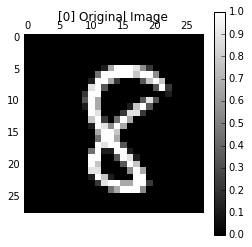

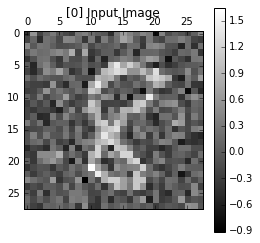

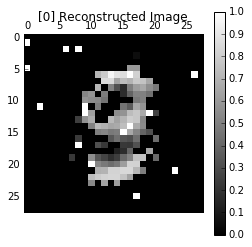

Epoch: 001/050 cost: 0.085332575
Epoch: 002/050 cost: 0.083262548
Epoch: 003/050 cost: 0.081130307
Epoch: 004/050 cost: 0.079253896
Epoch: 005/050 cost: 0.078418161
Epoch: 006/050 cost: 0.077811951
Epoch: 007/050 cost: 0.077556186
Epoch: 008/050 cost: 0.077112558
Epoch: 009/050 cost: 0.075723115
Epoch: 010/050 cost: 0.075319706


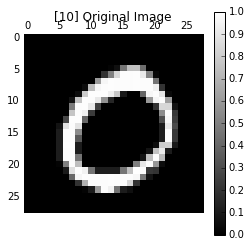

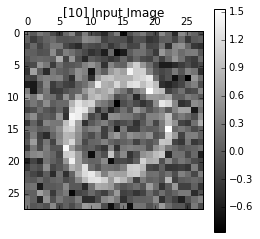

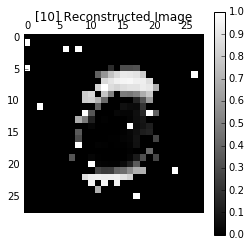

Epoch: 011/050 cost: 0.075257889
Epoch: 012/050 cost: 0.075124791
Epoch: 013/050 cost: 0.075057048
Epoch: 014/050 cost: 0.074382261
Epoch: 015/050 cost: 0.074242052
Epoch: 016/050 cost: 0.074306226
Epoch: 017/050 cost: 0.074240996
Epoch: 018/050 cost: 0.074143166
Epoch: 019/050 cost: 0.074038454
Epoch: 020/050 cost: 0.074009205


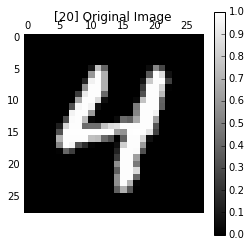

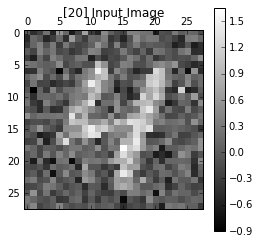

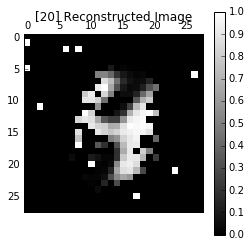

Epoch: 021/050 cost: 0.073960784
Epoch: 022/050 cost: 0.073591926
Epoch: 023/050 cost: 0.073152638
Epoch: 024/050 cost: 0.072612494
Epoch: 025/050 cost: 0.072548868
Epoch: 026/050 cost: 0.072368468
Epoch: 027/050 cost: 0.072244722
Epoch: 028/050 cost: 0.072457844
Epoch: 029/050 cost: 0.072214070
Epoch: 030/050 cost: 0.071948879


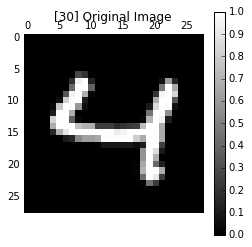

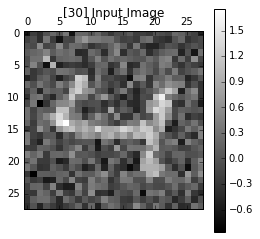

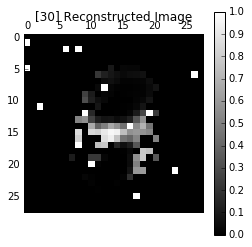

Epoch: 031/050 cost: 0.071900675
Epoch: 032/050 cost: 0.071897368
Epoch: 033/050 cost: 0.071866777
Epoch: 034/050 cost: 0.071771084
Epoch: 035/050 cost: 0.071893541
Epoch: 036/050 cost: 0.071621157
Epoch: 037/050 cost: 0.071481215
Epoch: 038/050 cost: 0.071307344
Epoch: 039/050 cost: 0.071385964
Epoch: 040/050 cost: 0.071402896


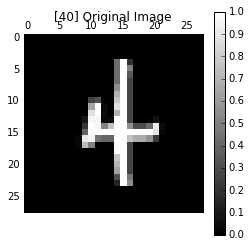

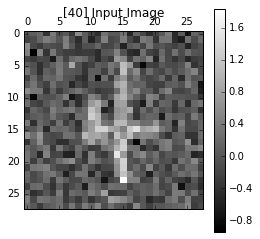

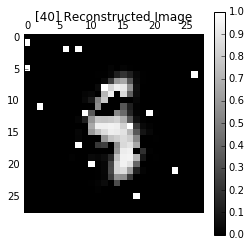

Epoch: 041/050 cost: 0.071323798
Epoch: 042/050 cost: 0.071408449
Epoch: 043/050 cost: 0.071324784
Epoch: 044/050 cost: 0.071413673
Epoch: 045/050 cost: 0.071329722
Epoch: 046/050 cost: 0.071336756
Epoch: 047/050 cost: 0.071278247
Epoch: 048/050 cost: 0.071402928
Epoch: 049/050 cost: 0.071163415
Optimization Finished!


In [4]:
"""
 Don't run this cell unless you want to train all over 
"""
do_train = 1

# Training 
sess.run(init)

if do_train:
    
    print ("Start Optimization")
    for epoch in range(training_epochs):
        avg_cost = 0.
        num_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(num_batch): 
            randidx = np.random.randint(trainimg.shape[0], size=batch_size)
            batch_xs = trainimg[randidx, :]
            batch_xs_noisy = batch_xs + 0.3*np.random.randn(batch_xs.shape[0], 784)

            batch_ys = trainlabel[randidx, :]                

            # Fit training using batch data
            if use_dropout:
                sess.run(optimizer, feed_dict={x: batch_xs_noisy, y: batch_xs, dropout_keep_prob: 0.5})
            else:
                sess.run(optimizer, feed_dict={x: batch_xs_noisy, y: batch_xs, dropout_keep_prob: 1.})
            # Compute average loss
            avg_cost += sess.run(cost, feed_dict={x: batch_xs_noisy, y: batch_xs, dropout_keep_prob: 1})/num_batch

        # Display logs per epoch step
        if epoch % display_step == 0:
            print ("Epoch: %03d/%03d cost: %.9f" % (epoch, training_epochs, avg_cost))
        if epoch % plot_step == 0:
            # Test one
            randidx  = np.random.randint(testimg.shape[0], size=1)
            testvec  = testimg[randidx, :]
            noisyvec = testvec + 0.3*np.random.randn(1, 784)
            outvec   = sess.run(out, feed_dict={x: testvec, dropout_keep_prob: 1.})
            outimg   = np.reshape(outvec, (28, 28))

            # Plot 
            plt.matshow(np.reshape(testvec, (28, 28)), cmap=plt.get_cmap('gray'))
            plt.title("[" + str(epoch) + "] Original Image")
            plt.colorbar()

            plt.matshow(np.reshape(noisyvec, (28, 28)), cmap=plt.get_cmap('gray'))
            plt.title("[" + str(epoch) + "] Input Image")
            plt.colorbar()

            plt.matshow(outimg, cmap=plt.get_cmap('gray'))
            plt.title("[" + str(epoch) + "] Reconstructed Image")
            plt.colorbar()
            plt.show()

            # Save 
            if use_dropout:
                saver.save(sess, savedir + 'dae_dr.ckpt', global_step=epoch)
            else:
                saver.save(sess, savedir + 'dae.ckpt', global_step=epoch)
    print ("Optimization Finished!")

In [6]:
# Restore
epoch = 40
if use_dropout:
    saver.restore(sess, "nets/dae_dr.ckpt-" + str(epoch))
else:
    saver.restore(sess, "nets/dae.ckpt-" + str(epoch))

In [ ]:
# Test one
randidx   = np.random.randint(testimg.shape[0], size=1)
orgvec    = testimg[randidx, :]
testvec   = testimg[randidx, :]
label     = np.argmax(testlabel[randidx, :], 1)

print ("label is %d" % (label)) 
# Noise type
ntype = 2 # 1: Gaussian Noise, 2: Salt and Pepper Noise
if ntype is 1:
    print ("Gaussian Noise")
    noisyvec = testvec + 0.3*np.random.randn(1, 784)
else:    
    print ("Salt and Pepper Noise")
    noisyvec = testvec
    rate     = 0.15
    noiseidx = np.random.randint(testimg.shape[1], size=int(testimg.shape[1]*rate))
    noisyvec[0, noiseidx] = 1-noisyvec[0, noiseidx]

outvec   = sess.run(out, feed_dict={x: noisyvec, dropout_keep_prob: 1})
outimg   = np.reshape(outvec, (28, 28))

# Plot 
plt.matshow(np.reshape(orgvec, (28, 28)), cmap=plt.get_cmap('gray'))
plt.title("Original Image")
plt.colorbar()

plt.matshow(np.reshape(noisyvec, (28, 28)), cmap=plt.get_cmap('gray'))
plt.title("Input Image")
plt.colorbar()

plt.matshow(outimg, cmap=plt.get_cmap('gray'))
plt.title("Reconstructed Image")
plt.colorbar()
plt.show() 

In [ ]:
# Visualize Filter 
from PIL import Image

def scale_to_unit_interval(ndar, eps=1e-8):
    """ Scales all values in the ndarray ndar to be between 0 and 1 """
    ndar = ndar.copy()
    ndar -= ndar.min()
    ndar *= 1.0 / (ndar.max() + eps)
    return ndar

def tile_raster_images(X, img_shape, tile_shape, tile_spacing=(0, 0),
                       scale_rows_to_unit_interval=True,
                       output_pixel_vals=True):
    assert len(img_shape) == 2
    assert len(tile_shape) == 2
    assert len(tile_spacing) == 2
    out_shape = [(ishp + tsp) * tshp - tsp for ishp, tshp, tsp
                      in zip(img_shape, tile_shape, tile_spacing)]

    if isinstance(X, tuple):
        assert len(X) == 4
        # Create an output numpy ndarray to store the image
        if output_pixel_vals:
            out_array = np.zeros((out_shape[0], out_shape[1], 4), dtype='uint8')
        else:
            out_array = np.zeros((out_shape[0], out_shape[1], 4), dtype=X.dtype)

        #colors default to 0, alpha defaults to 1 (opaque)
        if output_pixel_vals:
            channel_defaults = [0, 0, 0, 255]
        else:
            channel_defaults = [0., 0., 0., 1.]

        for i in range(4):
            if X[i] is None:
                # if channel is None, fill it with zeros of the correct
                # dtype
                out_array[:, :, i] = np.zeros(out_shape,
                      dtype='uint8' if output_pixel_vals else out_array.dtype
                      ) + channel_defaults[i]
            else:
                # use a recurrent call to compute the channel and store it
                # in the output
                out_array[:, :, i] = tile_raster_images(X[i], img_shape, tile_shape, tile_spacing, scale_rows_to_unit_interval, output_pixel_vals)
        return out_array

    else:
        # if we are dealing with only one channel
        H, W = img_shape
        Hs, Ws = tile_spacing

        # generate a matrix to store the output
        out_array = np.zeros(out_shape, dtype='uint8' if output_pixel_vals else X.dtype)


        for tile_row in range(tile_shape[0]):
            for tile_col in range(tile_shape[1]):
                if tile_row * tile_shape[1] + tile_col < X.shape[0]:
                    if scale_rows_to_unit_interval:
                        # if we should scale values to be between 0 and 1
                        # do this by calling the `scale_to_unit_interval`
                        # function
                        this_img = scale_to_unit_interval(X[tile_row * tile_shape[1] + tile_col].reshape(img_shape))
                    else:
                        this_img = X[tile_row * tile_shape[1] + tile_col].reshape(img_shape)
                    # add the slice to the corresponding position in the
                    # output array
                    out_array[
                        tile_row * (H+Hs): tile_row * (H + Hs) + H,
                        tile_col * (W+Ws): tile_col * (W + Ws) + W
                        ] \
                        = this_img * (255 if output_pixel_vals else 1)
        return out_array

# Visualize filter
w1 = sess.run(weights["h1"])

image = Image.fromarray(tile_raster_images(
        X = w1.T,
        img_shape=(28, 28), tile_shape=(10, 10),
        tile_spacing=(1, 1)))
image